<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/Experiment_with_LearningRate_and_TrainingEpochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from IPython import display
display.set_matplotlib_formats('svg')

<ipython-input-2-9526f032dfb3>:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


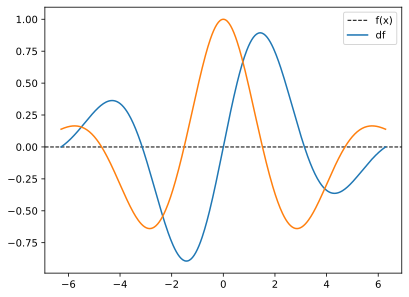

In [3]:
# the function
x = np.linspace(-2*np.pi, 2*np.pi, 401)
fx = np.sin(x) * np.exp(-x**2*0.05)

# and its derivative
df = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.5)

plt.axhline(0, color='black', linewidth=1, linestyle='--') # plot the x axis

# quick plot for inspection
plt.plot(x, fx, x, df)
plt.plot()
plt.legend(['f(x)', 'df'])

In [4]:
def fx(x):
  return np.sin(x) * np.exp(-x**2*0.05)

# derivative function
def deriv(x):
  return np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.5)

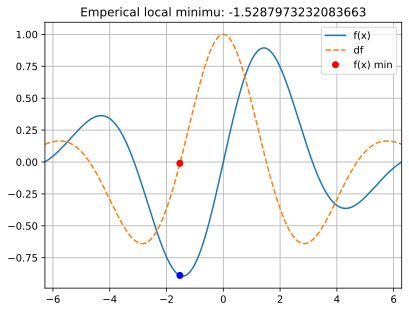

In [5]:
# random starting point
localmin = np.random.choice(x, 1) # np.array([6])

learning_rate = 0.01
training_epochs = 1000

# train
for i in range(training_epochs):
  grad = deriv(localmin)
  localmin = localmin - learning_rate * grad

#plot
plt.plot(x, fx(x), x, deriv(x), '--')
plt.plot(localmin, deriv(localmin), 'ro')
plt.plot(localmin, fx(localmin), 'bo')

plt.xlim(x[[0,-1]])
plt.grid()
plt.legend(['f(x)', 'df', 'f(x) min'])
plt.title('Emperical local minimu: %s' %localmin[0])

plt.show()

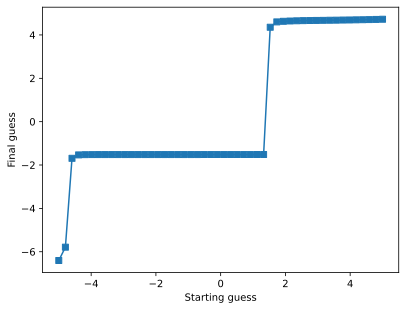

In [6]:
# Experiment 1: Systematically vary the starting locations

startlocs = np.linspace(-5, 5, 50)
finalres = np.zeros(len(startlocs))

#loop over starting points
for idx, localmin in enumerate(startlocs):

  #run through training
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - learning_rate * grad

  # store the final guess
  finalres[idx] = localmin

#plot the results
plt.plot(startlocs, finalres, 's-')
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show()



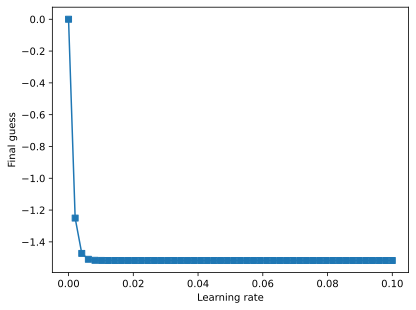

In [7]:
# Experiment 2: systematically vary the learning rate

learningrates = np.linspace(1e-10, 1e-1, 50)
finalres = np.zeros(len(learningrates))

# loop over learning rates
for idx, learningRate in enumerate(learningrates):

  # force starting guess to 0
  localmin = 0

  # train
  for i in range(training_epochs):
    grad = deriv(localmin)
    localmin = localmin - grad * learningRate


    # store the final guess
    finalres[idx] = localmin

plt.plot(learningrates, finalres, 's-')
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show()

In [13]:
# Experiment 3: Interaction between learning rate and trainging epochs

# setup parameters
learningrates = np.linspace(1e-10, 1e-1, 50)
training_epochs = np.round(np.linspace(10, 500, 40))

# initialize matrix to store results
finalres = np.zeros((len(learningrates), len(training_epochs)))

for Lidx, learningRate in enumerate(learningrates):
  # loop over training epochs
  for Eidx, trainEpochs in enumerate(training_epochs):
    localmin = 0
    for i in range(int(trainEpochs)):
      grad = deriv(localmin)
      localmin = localmin - grad * learningRate

      # store the final guess
      finalres[Lidx, Eidx] = localmin


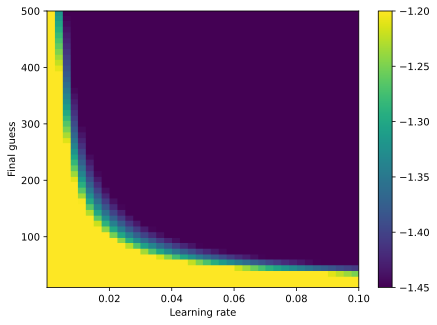

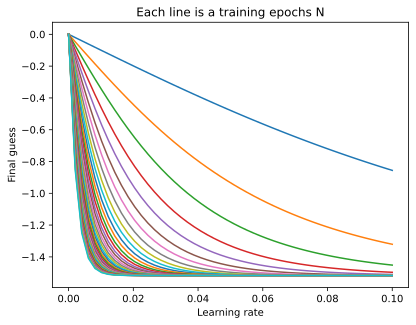

In [16]:
#plotting

fig, ax = plt.subplots(figsize = (7, 5))
plt.imshow(finalres,extent=[learningrates[0],learningrates[-1],training_epochs[0],training_epochs[-1]],
           aspect='auto',origin='lower',vmin=-1.45,vmax=-1.2)
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.colorbar()
plt.show()

# Another way of visualizing the above
plt.plot(learningrates, finalres)
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.title('Each line is a training epochs N')
plt.show()
